In [1]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
import pandas as pd

## Decision Tree

In [2]:
## demonstrando valores de entropia
data = []

for i in range(11):
    data.append(entropy([i/10,(10-i)/10],base=2))

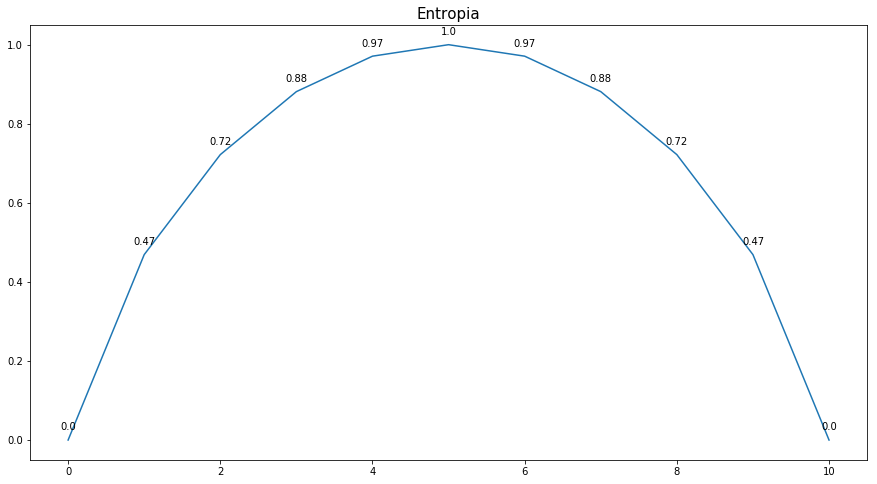

In [3]:
## plotando entropia

plt.figure(figsize=(15,8))
plt.plot(list(range(11)),data,label='curva da entropia')

for i,value in enumerate(data):
    plt.text(x = i , y = value + 0.02, s = round(value,2),horizontalalignment='center',verticalalignment='bottom')

plt.title('Entropia',size=15)
plt.show()

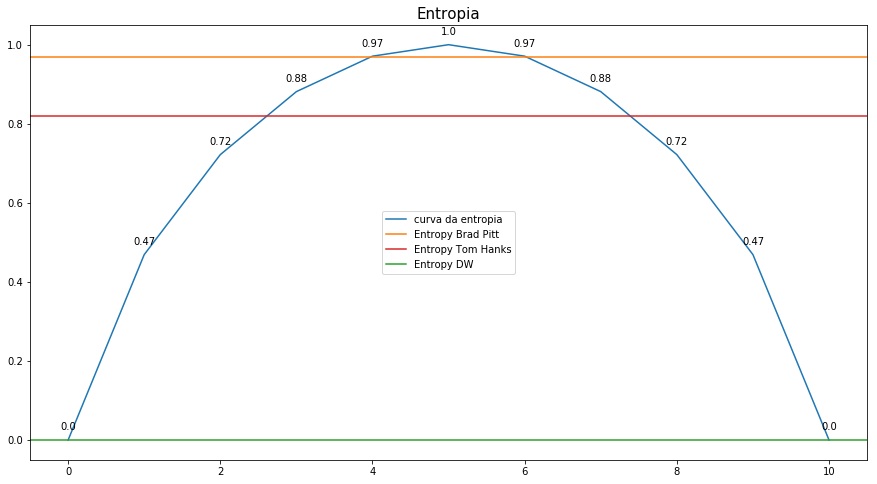

In [4]:
## plotando os 3 atores

plt.figure(figsize=(15,8))
plt.plot(list(range(11)),data,label='curva da entropia')

for i,value in enumerate(data):
    plt.text(x = i , y = value + 0.02, s = round(value,2),horizontalalignment='center',verticalalignment='bottom')

plt.axhline(y=0.97,label = 'Entropy Brad Pitt', color='tab:orange')
plt.axhline(y=0.82,label = 'Entropy Tom Hanks', color='tab:red')
plt.axhline(y=0.0,label = 'Entropy DW', color='tab:green')

plt.legend()
plt.title('Entropia',size=15)
plt.show()

In [6]:
## lendo o dataset

df = pd.read_csv('../data/decision_tree_example - Página1.csv')
df.head()

,Filme,Ator,Categoria,Avaliação,Assistiu?
0,Bastador Inglórios,Brad Pitt,Ação,Mediana,Não
1,Porcos e Diamantes,Brad Pitt,Ação,Mediana,Não
2,Tróia,Brad Pitt,Ação,Baixa,Não
3,O curioso caso de Benjamin Button,Brad Pitt,Drama,Mediana,Não
4,Sr e Sra Smith,Brad Pitt,Romance,Baixa,Não


In [7]:
## definindo X e Y
x = df.drop(['Filme','Assistiu?'],axis=1)
y = df['Assistiu?']

In [16]:
## importando o modelo
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [17]:
## treinando

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

ValueError: could not convert string to float: 'Brad Pitt'

In [18]:
## fatorizando a coluna Ator

pd.factorize(x['Ator'])

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2]),
 Index(['Brad Pitt', 'Denzel Washington', 'Tom Hanks'], dtype='object'))

In [19]:
## fatorizando a coluna Categoria

pd.factorize(x['Categoria'])

(array([0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2]),
 Index(['Ação', 'Drama', 'Romance'], dtype='object'))

In [20]:
## fatorizando a coluna Avaliação

pd.factorize(x['Avaliação'])

(array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2]),
 Index(['Mediana', 'Baixa', 'Excepcional'], dtype='object'))

In [23]:
for feature in x.columns:
    x[feature] = pd.factorize(x[feature])[0]
    
x.head()

,Ator,Categoria,Avaliação
0,0,0,0
1,0,0,0
2,0,0,1
3,0,1,0
4,0,2,1


In [8]:
## treinando

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

NameError: name 'DecisionTreeClassifier' is not defined

In [25]:
## classes

dt.classes_

array(['Não', 'Sim'], dtype=object)

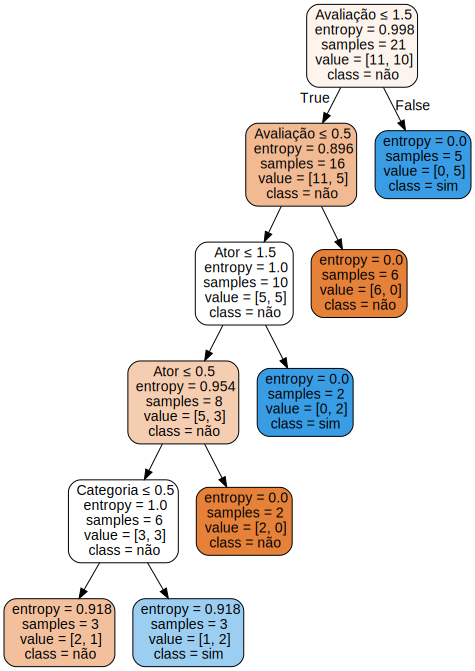

In [28]:
import graphviz
from sklearn import tree

# dot is a graph description language
dot = tree.export_graphviz(dt, out_file=None, 
                           feature_names=x.columns.values,  
                           class_names=["não", "sim"],  
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph

In [29]:
## inspecionando a importância das features

print(dt.feature_importances_)
print(x.columns)

[0.25880148 0.03171774 0.70948078]
Index(['Ator', 'Categoria', 'Avaliação'], dtype='object')


In [33]:
## predizendo o resultado para um filme do Brad Pitt, de romance, de avalição baixa

dt.predict([[0,2,1]])

array(['Não'], dtype=object)

In [35]:
## predizendo o resultado para um filme do Brad Pitt, de romance, de avalição mediana

dt.predict([[0,2,0]])

array(['Sim'], dtype=object)

In [36]:
## predizendo o resultado para um filme do Brad Pitt, de romance, de avalição mediana

dt.predict([[0,2,0]])

array(['Sim'], dtype=object)

In [37]:
## avaliando as probabilidades para um filme do Brad Pitt, de romance, de avalição baixa

dt.predict_proba([[0,2,1]])

array([[1., 0.]])

In [38]:
## avaliando as probabilidades para um filme do Brad Pitt, de romance, de avalição mediana

dt.predict_proba([[0,2,0]])

array([[0.33333333, 0.66666667]])

## Random Forest + Pipeline + Titanic

In [39]:
## dataset

df = pd.read_csv('../data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
## verificando correlações

df.corr().style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


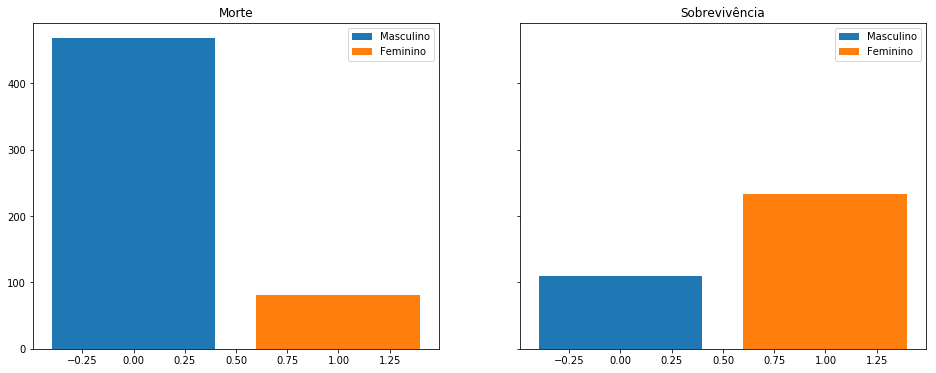

In [77]:
f, ax = plt.subplots(1,2,figsize=(16,6),sharey=True)

data_morte = df.query("Survived == 0").Sex.value_counts()

ax[0].bar(0,data_morte['male'],label='Masculino')
ax[0].bar(1,data_morte['female'],label='Feminino')
ax[0].set_title('Morte')
ax[0].legend()

data_sobrevivencia = df.query("Survived == 1").Sex.value_counts()

ax[1].bar(0,data_sobrevivencia['male'],label='Masculino')
ax[1].bar(1,data_sobrevivencia['female'],label='Feminino')
ax[1].set_title('Sobrevivência')
ax[1].legend()

plt.show()

In [80]:
## porcentagens de pessoas que morreram por sexo

df.query("Survived == 0").Sex.value_counts(normalize=True)

male      0.852459
female    0.147541
Name: Sex, dtype: float64

In [81]:
## porcentagens de pessoas que sobreviveram por sexo

df.query("Survived == 1").Sex.value_counts(normalize=True)

female    0.681287
male      0.318713
Name: Sex, dtype: float64

In [85]:
## porcentagem de Survived total

df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

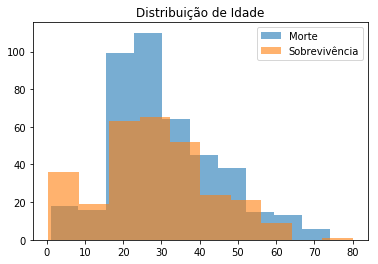

In [92]:
plt.hist(df.query("Survived == 0").Age,alpha=0.6,label='Morte')
plt.hist(df.query("Survived == 1").Age,alpha=0.6,label='Sobrevivência')
plt.title('Distribuição de Idade')
plt.legend()
plt.show()

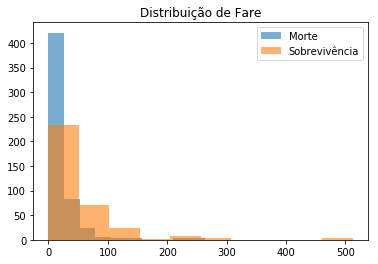

In [93]:
plt.hist(df.query("Survived == 0").Fare,alpha=0.6,label='Morte')
plt.hist(df.query("Survived == 1").Fare,alpha=0.6,label='Sobrevivência')
plt.title('Distribuição de Fare')
plt.legend()
plt.show()

In [96]:
data_morte = df.query("Survived == 0").Embarked.value_counts()
data_morte

S    427
C     75
Q     47
Name: Embarked, dtype: int64

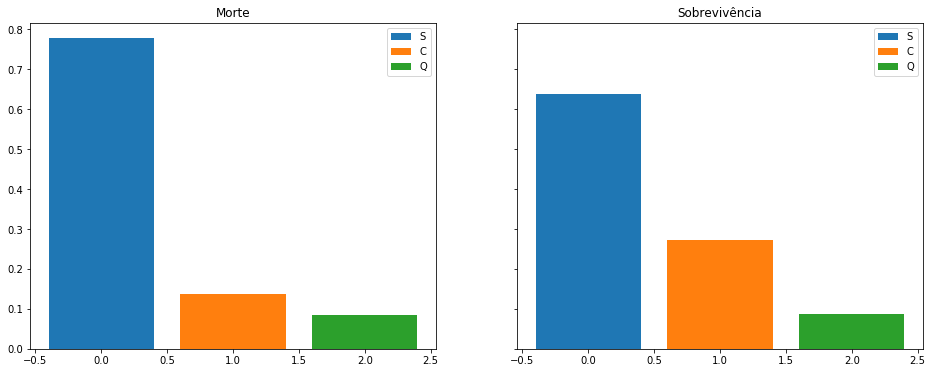

In [98]:
f, ax = plt.subplots(1,2,figsize=(16,6),sharey=True)

data_morte = df.query("Survived == 0").Embarked.value_counts(normalize=True)

ax[0].bar(0,data_morte['S'],label='S')
ax[0].bar(1,data_morte['C'],label='C')
ax[0].bar(2,data_morte['Q'],label='Q')
ax[0].set_title('Morte')
ax[0].legend()

data_sobrevivencia = df.query("Survived == 1").Embarked.value_counts(normalize=True)

ax[1].bar(0,data_sobrevivencia['S'],label='S')
ax[1].bar(1,data_sobrevivencia['C'],label='C')
ax[1].bar(2,data_sobrevivencia['Q'],label='Q')
ax[1].set_title('Sobrevivência')
ax[1].legend()

plt.show()

In [110]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
## Seprando X e Y

x = df.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df.Survived

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
set_config(display='diagram')

In [115]:
## separando features

cat_features = ['Pclass','Sex','Embarked']
num_features = ['Age','SibSp','Parch','Fare']

In [116]:
## criando os passos

steps_cat = [('imputer_cat',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder())]
steps_num = [('imputer_num',SimpleImputer(strategy='mean'))]

## criando os pipelines

pipe_cat = Pipeline(steps_cat)
pipe_num = Pipeline(steps_num)

In [117]:
## criando o column transformer

transformers = [('cat',pipe_cat,cat_features),
                ('num',pipe_num,num_features)]

col_transf = ColumnTransformer(transformers)

In [118]:
## criando o pipeline final

pipe_final = Pipeline(steps=[('pre_processing',col_transf),('random',RandomForestClassifier())])

In [119]:
pipe_final

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('random', RandomForestClassifier())])

In [10]:
## Comparando modelos

def compare_models(model1,model2,x,y,cv):
    print('-- COMPARING MODELS --')
    print(f'Model 1 : {cross_val_score(model1,X=x,y=y,cv=cv).mean()}')
    print(f'Model 2 : {cross_val_score(model2,X=x,y=y,cv=cv).mean()}')

In [112]:
## qual modelo é o melhor?

compare_models(DummyClassifier(strategy='most_frequent'),pipe_final,x,y,cv=10)

-- COMPARING MODELS --
Model 1 : 0.616167290886392
Model 2 : 0.8137578027465666


In [120]:
## verificando os parâmetros que podem ser procurados com GridSearchCV

pipe_final.get_params()

{'memory': None,
 'steps': [('pre_processing', ColumnTransformer(transformers=[('cat',
                                    Pipeline(steps=[('imputer_cat',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ohe', OneHotEncoder())]),
                                    ['Pclass', 'Sex', 'Embarked']),
                                   ('num',
                                    Pipeline(steps=[('imputer_num',
                                                     SimpleImputer())]),
                                    ['Age', 'SibSp', 'Parch', 'Fare'])])),
  ('random', RandomForestClassifier())],
 'verbose': False,
 'pre_processing': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('imputer_cat',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('ohe', OneHotE

In [121]:
param_grid = {'random__n_estimators': [100,200,300,400,500],
              'random__max_depth': [5,6,7,8,9,10],
              'random__criterion': ['entropy'],
              'random__min_samples_leaf': [5,10,15],
              'random__class_weight': [None,'balanced'],
              'random__random_state': [42],
              'pre_processing__num__imputer_num__strategy': ['mean','median','most_frequent']}

grid = GridSearchCV(pipe_final,param_grid=param_grid,cv=10,n_jobs=-1,return_train_score=True)
grid.fit(x,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare'])])),
                                       ('random', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pre_processing__num__imputer_num__strategy': ['mean',
                                                                        'median',
                                                                        'most_frequent'],
                         'random__class_weight': [None, 'balanced'],
                         'random__criterion': ['entropy'],
                         'random__max_depth': [5, 6, 7, 8, 9, 10],
                         'random__min_samples_leaf': [5, 10, 15],
                         'random__n_estimators': [100, 200, 300, 400, 500],
                         'random__random_state': [42]},
             return_train_score=True)

In [122]:
## criando o dataframe de grid

grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pre_processing__num__imputer_num__strategy,param_random__class_weight,param_random__criterion,param_random__max_depth,param_random__min_samples_leaf,param_random__n_estimators,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.211381,0.007271,0.020484,0.001114,mean,None,entropy,5,5,100,...,0.857855,0.834165,0.836658,0.844140,0.841646,0.852868,0.837905,0.839152,0.842125,0.007298
1,0.401594,0.011922,0.032476,0.001287,mean,None,entropy,5,5,200,...,0.854115,0.832918,0.836658,0.844140,0.849127,0.847880,0.837905,0.839152,0.842625,0.007051
2,0.602847,0.015659,0.045852,0.001825,mean,None,entropy,5,5,300,...,0.855362,0.835411,0.831671,0.841646,0.850374,0.847880,0.836658,0.837905,0.842375,0.007809
3,0.828878,0.028318,0.060415,0.001988,mean,None,entropy,5,5,400,...,0.855362,0.834165,0.836658,0.842893,0.849127,0.847880,0.839152,0.840399,0.843623,0.007141
4,1.071470,0.029622,0.078694,0.003961,mean,None,entropy,5,5,500,...,0.855362,0.835411,0.832918,0.844140,0.847880,0.849127,0.841646,0.841646,0.843872,0.007284


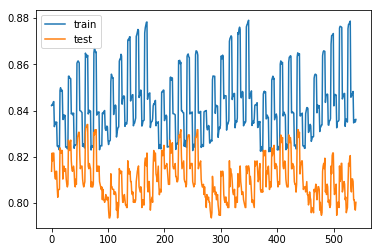

In [127]:
plt.plot(grid_df['mean_train_score'],label='train')
plt.plot(grid_df['mean_test_score'],label='test')
plt.legend()

In [130]:
grid_df[['mean_train_score','mean_test_score','rank_test_score']].sort_values('rank_test_score')

,mean_train_score,mean_test_score,rank_test_score
63,0.862952,0.833945,1
64,0.863825,0.833945,1
61,0.863576,0.832834,3
62,0.864075,0.832821,4
259,0.863950,0.831698,5
...,...,...,...
104,0.827160,0.794682,533
103,0.826786,0.793558,537
102,0.826786,0.793558,537
117,0.831899,0.793558,537


In [132]:
grid_df.loc[63,:].params

{'pre_processing__num__imputer_num__strategy': 'mean',
 'random__class_weight': None,
 'random__criterion': 'entropy',
 'random__max_depth': 9,
 'random__min_samples_leaf': 5,
 'random__n_estimators': 400,
 'random__random_state': 42}

## Confusion Matrix

In [133]:
from sklearn.metrics import plot_confusion_matrix,  classification_report

In [134]:
## setando novos parâmetros

pipe_final.set_params(pre_processing__num__imputer_num__strategy = 'mean',
                      random__class_weight = None,
                      random__criterion = 'entropy',
                      random__max_depth = 9,
                      random__min_samples_leaf = 5,
                      random__n_estimators = 400,
                      random__random_state = 42)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('random',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=5, n_estimators=400,
                                        random_state=42))])

In [137]:
## criando treino e teste

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(668, 7) (668,)
(223, 7) (223,)


In [139]:
pipe_final.fit(x_train,y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('random',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=5, n_estimators=400,
                                        random_state=42))])

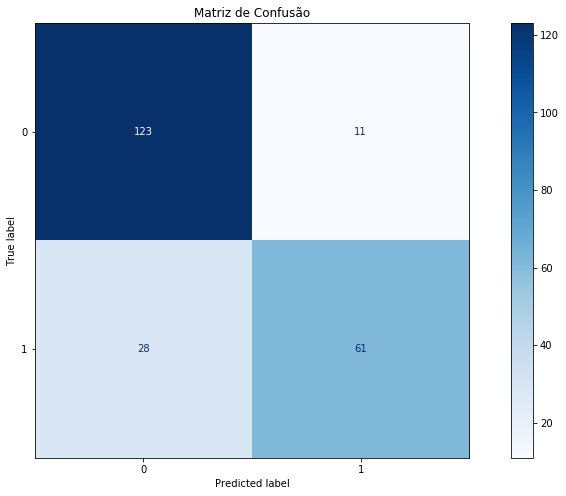

In [140]:
f, ax = plt.subplots(1,1,figsize=(15,8))

plot_confusion_matrix(pipe_final,x_test,y_test,ax=ax,cmap=plt.cm.Blues,values_format='.4g')

ax.set_title('Matriz de Confusão')

plt.show()

In [141]:
## classification report

print(classification_report(y_test,pipe_final.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       134
           1       0.85      0.69      0.76        89

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



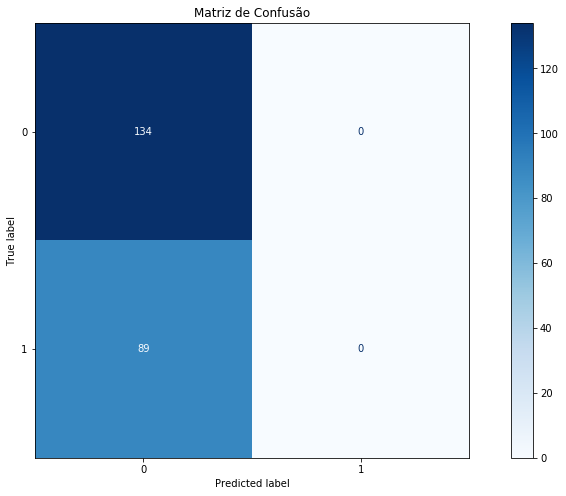

In [142]:
f, ax = plt.subplots(1,1,figsize=(15,8))

plot_confusion_matrix(DummyClassifier(strategy='most_frequent').fit(x_train,y_train),x_test,y_test,ax=ax,cmap=plt.cm.Blues,values_format='.4g')

ax.set_title('Matriz de Confusão')

plt.show()

In [146]:
## classification report

print(classification_report(y_test,DummyClassifier('most_frequent').fit(x_train,y_train).predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       134
           1       0.00      0.00      0.00        89

    accuracy                           0.60       223
   macro avg       0.30      0.50      0.38       223
weighted avg       0.36      0.60      0.45       223

